In [1]:
import json
from pathlib import Path
from pprint import pprint
import numpy as np

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{bm}')
%config InlineBackend.figure_formats = ['svg']
PROJECT_ROOT = Path('..').resolve()

Norm vs -log(p) for top 500 words in average_word_embeddings_glove.840B.300d


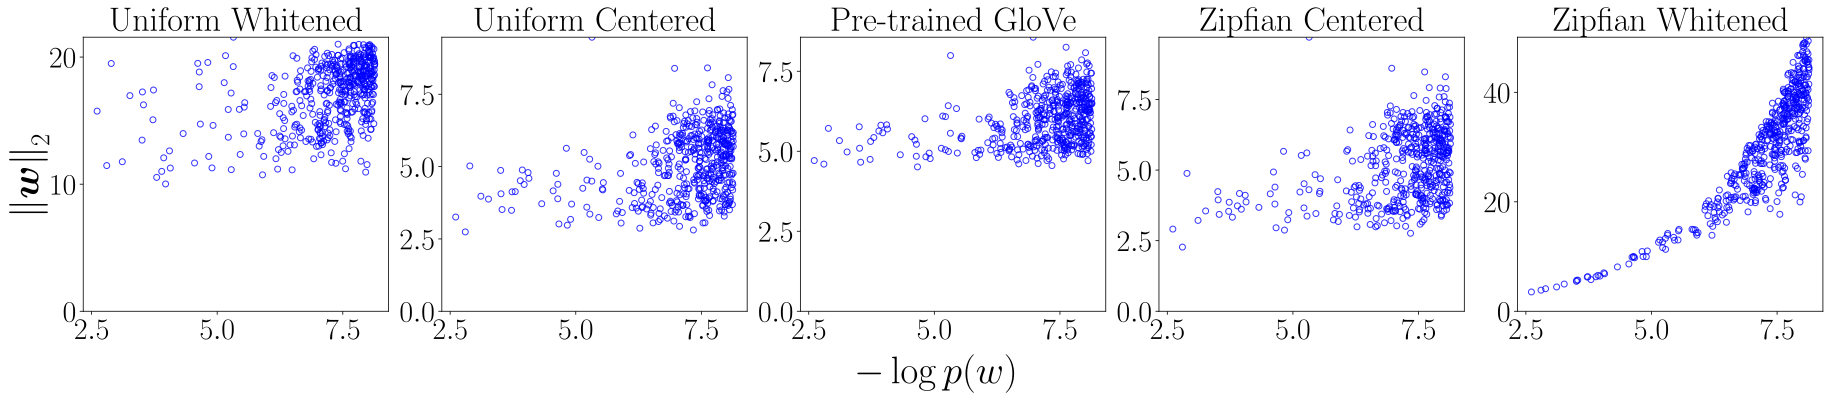

In [2]:
def set_centered_ylim(ax, y_data, margin=10):
    avg = sum(y_data) / len(y_data)
    # ymin = avg - avg
    # ymax = avg + avg
    ax.set_ylim(0, max(y_data))
    return avg
label_fontsize = 34
tick_fontsize = 30
cbar_fontsize = 30

import numpy as np
import matplotlib.pyplot as plt
model_name = 'average_word_embeddings_glove.840B.300d' 
topk = 500
result_path = PROJECT_ROOT / f'results/{model_name}/norm_experiments/{str(topk)}/results.json'
with open(result_path, 'r') as f:
    result = json.load(f)

prob = np.array(result['prob'])
assert np.allclose(prob.sum() ,1)
logp = -np.log(prob)

norm = np.array(result['norm'])
uniform_centered_norm = np.array(result['uniform_centered_norm'])
uniform_whitened_norm = np.array(result['uniform_whitened_norm'])
zipfian_centered_norm = np.array(result['zipfian_centered_norm'])
zipfian_whitened_norm = np.array(result['zipfian_whitened_norm'])

data = {
    'Uniform Whitened': uniform_whitened_norm,
    'Uniform Centered': uniform_centered_norm,
    'Pre-trained GloVe': norm,
    'Zipfian Centered': zipfian_centered_norm,
    'Zipfian Whitened': zipfian_whitened_norm,
}

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharex=True)
alpha = 0.5
for i, (name, y_data) in enumerate(data.items()):
    x_data = logp
    axes[i].scatter(x_data, y_data,alpha=0.8,edgecolor='blue', facecolor='none')
    axes[i].set_title(name, fontsize=label_fontsize)
    axes[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    _ = set_centered_ylim(axes[i], y_data)
# Adjust layout
plt.tight_layout()
# set title on top of the figure
print(f'Norm vs -log(p) for top {topk} words in {model_name}')
# Show plot
fig.text(0.5, -0.05, r'$-\log{p(w)}$', ha='center', va='center',fontsize=label_fontsize+5)
fig.text(-0.005, 0.5, r"${\lVert \bm{w} \rVert}_2$", ha='center', va='center', rotation='vertical',fontsize=label_fontsize+5)
plt.savefig('figs/norm_glove.pdf',bbox_inches='tight')
plt.show()

Norm vs -log(p) for top 500 words in GoogleNews-vectors-negative300


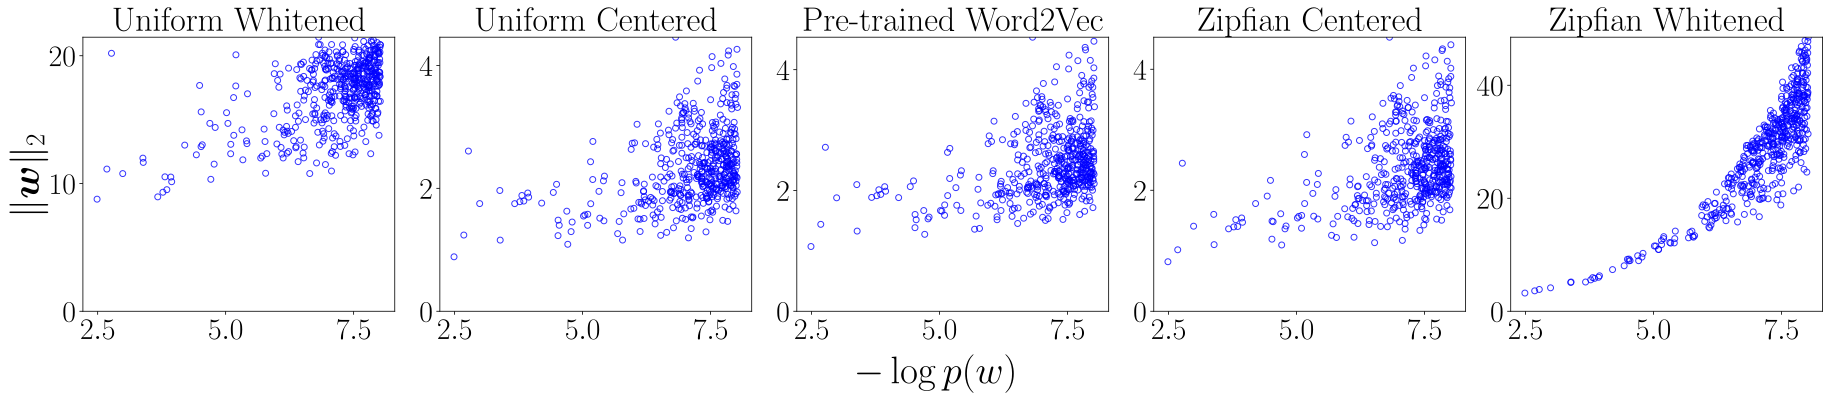

In [3]:
def set_centered_ylim(ax, y_data, margin=10):
    avg = sum(y_data) / len(y_data)
    # ymin = avg - avg
    # ymax = avg + avg
    ax.set_ylim(0, max(y_data))
    return avg
label_fontsize = 34
tick_fontsize = 30
cbar_fontsize = 30

import numpy as np
import matplotlib.pyplot as plt
model_name = 'GoogleNews-vectors-negative300'
topk = 500
result_path = PROJECT_ROOT / f'results/{model_name}/norm_experiments/{str(topk)}/results.json'
with open(result_path, 'r') as f:
    result = json.load(f)

prob = np.array(result['prob'])
assert np.allclose(prob.sum() ,1)
logp = -np.log(prob)

norm = np.array(result['norm'])
uniform_centered_norm = np.array(result['uniform_centered_norm'])
uniform_whitened_norm = np.array(result['uniform_whitened_norm'])
zipfian_centered_norm = np.array(result['zipfian_centered_norm'])
zipfian_whitened_norm = np.array(result['zipfian_whitened_norm'])


data = {
    'Uniform Whitened': uniform_whitened_norm,
    'Uniform Centered': uniform_centered_norm,
    'Pre-trained Word2Vec': norm,
    'Zipfian Centered': zipfian_centered_norm,
    'Zipfian Whitened': zipfian_whitened_norm,
}

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharex=True)
alpha = 0.5
for i, (name, y_data) in enumerate(data.items()):
    x_data = logp
    axes[i].scatter(x_data, y_data,alpha=0.8,edgecolor='blue', facecolor='none')
    axes[i].set_title(name, fontsize=label_fontsize)
    axes[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    _ = set_centered_ylim(axes[i], y_data)
# Adjust layout
plt.tight_layout()
# set title on top of the figure
print(f'Norm vs -log(p) for top {topk} words in {model_name}')
# Show plot
fig.text(0.5, -0.05, r'$-\log{p(w)}$', ha='center', va='center',fontsize=label_fontsize+5)
fig.text(-0.005, 0.5, r"$\lVert \bm{w} \rVert_2$", ha='center', va='center', rotation='vertical',fontsize=label_fontsize+5)
plt.savefig('figs/norm_word2vec.pdf',bbox_inches='tight')
plt.show()